In [1]:
import pandas as pd
import numpy as np
import networkx as graphx

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas_datareader

In [13]:
%run Functionality.py

In [14]:
data_path='/Users/george/Desktop/Projects/Capstone/Langague-Analysis/Data/'

In [21]:
TMTs=pd.read_excel(data_path+'TMT Universe Data.xlsx',index_col='Ticker',converters={'CIK':str})

In [22]:
TMTs

,Name,CIK,SIC,FY,2020,2019,2018,2017,2016,2015,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
Ticker,,,,,,,,,,,,,,,,,,,,,
ATEN,A10 NETWORKS INC,1580808,3576,1231,0001580808-21-000043,0001580808-20-000014,0001628280-19-003017,0001628280-18-011503,0001580808-17-000013,0001580808-16-000073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATVI,Activision Blizzard,718877,7372,1231,0001628280-21-002828,0000718877-20-000003,0001047469-19-000788,0001047469-18-001114,0001047469-17-001072,0001047469-16-010584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADBE,Adobe,796343,7372,1129,0000796343-21-000004,0000796343-20-000013,0000796343-19-000019,0000796343-18-000015,0000796343-17-000031,0000796343-16-000224,...,0001047469-04-003345,0001174947-03-000004,0000912057-02-007164,0000912057-01-006700,0000912057-00-007295,0001047469-99-006452,0001047469-98-006671,0000912057-97-006476,0000912057-96-002896,0000912057-95-000843
AMD,Advanced Micro Devices,2488,3674,1226,0001628280-21-001185,0000002488-20-000008,0000002488-19-000011,0000002488-18-000042,0000002488-17-000043,0000002488-16-000111,...,0001193125-04-037179,0001012870-03-001181,0001012870-02-001071,0001012870-99-000892,0001012870-97-000533,0000950131-95-000530,0000891618-94-000068,NaN,NaN,NaN
ABNB,Airbnb,1559720,7340,1231,0001559720-21-000010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTCH,Match.com Group,891103,7200,1231,0000891103-21-000014,0000891103-20-000004,0000891103-19-000006,0000891103-18-000003,0000891103-17-000003,0000891103-16-000023,...,0001047469-04-008077,0001047469-03-011015,0000912057-00-009489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPG,Interpublic Group,51644,7311,1231,0000051644-21-000012,0000051644-20-000013,0000051644-19-000009,0000051644-18-000019,0000051644-17-000007,0000051644-16-000056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WU,Western Union,1365135,7389,1231,0001558370-21-001284,0001558370-20-001090,0001558370-19-000848,0001365135-18-000013,0001365135-17-000008,0001365135-16-000062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
yearly_grp=pd.Grouper(freq='A')
quarterly_grp=pd.Grouper(freq='Q')
monthly_gro=pd.Grouper(freq='M')
years=[str(yr) for yr in range(2011,2021,1)]

In [23]:
stock_prices=dict.fromkeys(TMTs.index)

In [24]:
s

'VMEO'

In [25]:
for s in stock_prices.keys():
    stock_prices[s]=pandas_datareader.DataReader(s, 
                       start='2010-12-31', 
                       end='2020-12-31', 
                       data_source='yahoo')['Adj Close']

In [26]:
df_prices=pd.DataFrame.from_dict(stock_prices)

In [ ]:
df_prices

In [27]:
df_changes=(df_prices/df_prices.shift(1))-1
df_changes=df_changes.drop(pd.to_datetime('2010-12-31'))
df_changes.head()

,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,SONO,IRBT,PLTR,ROKU,EBAY,MTCH,IPG,WU,TRIP,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,0.006431,0.016569,0.035452,NaN,0.025717,NaN,0.023444,NaN,NaN,...,NaN,0.015273,NaN,NaN,0.030543,0.046690,0.013183,0.009155,NaN,0.008427
2011-01-04,NaN,0.000799,0.007031,0.035419,NaN,-0.023208,NaN,0.004288,NaN,NaN,...,NaN,0.004355,NaN,NaN,-0.007322,-0.020306,-0.026952,-0.006937,NaN,-0.016017
2011-01-05,NaN,-0.019154,0.022533,0.015963,NaN,0.036275,NaN,0.013026,NaN,NaN,...,NaN,0.023256,NaN,NaN,0.009133,0.008494,0.014327,0.017732,NaN,0.011323
2011-01-06,NaN,-0.002441,0.001552,-0.024691,NaN,-0.008188,NaN,-0.008324,NaN,NaN,...,NaN,0.013097,NaN,NaN,-0.010790,-0.001347,-0.000942,0.022704,NaN,-0.013296
2011-01-07,NaN,-0.013051,-0.007127,0.016111,NaN,0.004954,NaN,-0.001991,NaN,NaN,...,NaN,-0.012167,NaN,NaN,-0.025334,-0.004049,0.047125,-0.009293,NaN,0.007801


In [28]:
def vs_benchmark(daily_changes,bmrk_id,start_date,end_date):
    bmark=pandas_datareader.DataReader(bmrk_id, 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']
    bmark_changes=(bmark/bmark.shift(1))-1
    bmark_changes=bmark_changes.drop(pd.to_datetime(start_date))
    return daily_changes.subtract(bmark_changes,axis=0)
    #return bmark_changes


In [34]:
vs_bmark=vs_benchmark(df_changes,'^NYY','2010-12-31','2020-12-31')

In [35]:
vs_bmark

,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,SONO,IRBT,PLTR,ROKU,EBAY,MTCH,IPG,WU,TRIP,WWE
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,-0.003274,0.006864,0.025748,NaN,0.016013,NaN,0.013740,NaN,NaN,...,NaN,0.005569,NaN,NaN,0.020838,0.036985,0.003478,-0.000550,NaN,-0.001278
2011-01-04,NaN,-0.002808,0.003424,0.031812,NaN,-0.026815,NaN,0.000681,NaN,NaN,...,NaN,0.000748,NaN,NaN,-0.010929,-0.023913,-0.030559,-0.010544,NaN,-0.019624
2011-01-05,NaN,-0.021399,0.020288,0.013719,NaN,0.034030,NaN,0.010782,NaN,NaN,...,NaN,0.021011,NaN,NaN,0.006888,0.006250,0.012082,0.015487,NaN,0.009079
2011-01-06,NaN,0.000454,0.004446,-0.021797,NaN,-0.005294,NaN,-0.005429,NaN,NaN,...,NaN,0.015991,NaN,NaN,-0.007896,0.001547,0.001953,0.025598,NaN,-0.010402
2011-01-07,NaN,-0.008744,-0.002820,0.020418,NaN,0.009261,NaN,0.002317,NaN,NaN,...,NaN,-0.007860,NaN,NaN,-0.021027,0.000258,0.051433,-0.004986,NaN,0.012109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.024491,0.010216,0.007839,0.004742,-0.018160,0.005638,-0.000590,-0.002047,-0.017629,-0.022105,...,-0.018931,-0.006873,-0.030862,-0.007999,-0.017852,-0.006638,0.001902,0.007885,-0.002692,-0.007311
2020-12-28,0.015636,0.007751,0.000764,0.000297,-0.035132,0.000909,0.027286,0.037655,-0.045225,0.041151,...,-0.033013,0.016912,-0.073812,-0.043860,0.004978,-0.010567,0.014064,-0.004278,0.049123,0.015264
2020-12-29,-0.037728,0.003241,0.010231,-0.006801,0.010609,-0.001416,0.030441,0.015481,-0.037944,0.024073,...,-0.018165,-0.035606,-0.033949,0.001430,0.016238,0.004830,-0.000726,-0.002091,0.023743,0.009114


In [36]:
corr=df_changes.corr()
covar=df_changes.cov()

In [39]:
rel_corr=vs_bmark.corr()
rel_covar=vs_bmark.cov()

In [38]:
annual_corr=df_changes.groupby(yearly_grp).corr()
rel_annual_corr=vs_bmark.groupby(yearly_grp).corr()

In [79]:
annual_corr

ATEN      ATVI      ADBE       AMD      ABNB      AKAM  \
Date                                                                          
2011-12-31 ATEN       NaN       NaN       NaN       NaN       NaN       NaN   
           ATVI       NaN  1.000000  0.552219  0.459718       NaN  0.424946   
           ADBE       NaN  0.552219  1.000000  0.603351       NaN  0.454684   
           AMD        NaN  0.459718  0.603351  1.000000       NaN  0.517925   
           ABNB       NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
2020-12-31 V     0.410748  0.400290  0.680388  0.549636 -0.147162  0.418998   
           VIAC  0.360895  0.096944  0.297581  0.301724 -0.038311  0.189500   
           WDAY  0.443132  0.409253  0.709545  0.507242  0.538770  0.348244   
           ZEN   0.378105  0.398594  0.683207  0.542374  0.452998  0.440018   
           ZUO   0.345914  0.364920  0.456771  0.376270  0.172061  0.475138   

                     ATUS      AMZN       AMC      AMCX  ...      TMUS  \
Date                                                     ...             
2011-12-31 ATEN       NaN       NaN       NaN       NaN  ...       NaN   
           ATVI       NaN  0.395470       NaN  0.399453  ...  0.353100   
           ADBE       NaN  0.534133       NaN  0.474602  ...  0.429253   
           AMD        NaN  0.467070       NaN  0.420362  ...  0.383998   
           ABNB       NaN       NaN       NaN       NaN  ...       NaN   
...                   ...       ...       ...       ...  ...       ...   
2020-12-31 V     0.626181  0.447751  0.447155  0.444109  ...  0.610587   
           VIAC  0.481052  0.205379  0.347283  0.590672  ...  0.430321   
           WDAY  0.538084  0.533593  0.313781  0.202948  ...  0.552740   
           ZEN   0.540150  0.542754  0.304059  0.182042  ...  0.539040   
           ZUO   0.422764  0.454166  0.195050  0.142816  ...  0.304719   

                     TWLO      TWTR      UPLD      VRSN         V      VIAC  \
Date                                                                          
2011-12-31 ATEN       NaN       NaN       NaN       NaN       NaN       NaN   
           ATVI       NaN       NaN       NaN  0.459531  0.435839  0.507661   
           ADBE       NaN       NaN       NaN  0.597109  0.569510  0.658824   
           AMD        NaN       NaN       NaN  0.532180  0.481481  0.578119   
           ABNB       NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
2020-12-31 V     0.341523  0.593432  0.552932  0.748513  1.000000  0.582769   
           VIAC  0.255475  0.420303  0.424851  0.413384  0.582769  1.000000   
           WDAY  0.560640  0.550861  0.618156  0.553671  0.628757  0.372933   
           ZEN   0.570991  0.494524  0.597465  0.684245  0.673625  0.389568   
           ZUO   0.407680  0.339773  0.430936  0.458597  0.383128  0.247753   

                     WDAY       ZEN       ZUO  
Date                                           
2011-12-31 ATEN       NaN       NaN       NaN  
           ATVI       NaN       NaN       NaN  
           ADBE       NaN       NaN       NaN  
           AMD        NaN       NaN       NaN  
           ABNB       NaN       NaN       NaN  
...                   ...       ...       ...  
2020-12-31 V     0.628757  0.673625  0.383128  
           VIAC  0.372933  0.389568  0.247753  
           WDAY  1.000000  0.682652  0.444264  
           ZEN   0.682652  1.000000  0.473562  
           ZUO   0.444264  0.473562  1.000000  

[760 rows x 76 columns]

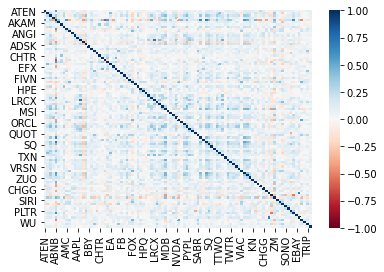

In [40]:
sns.heatmap(rel_corr,vmin=-1,vmax=1,cmap='RdBu');

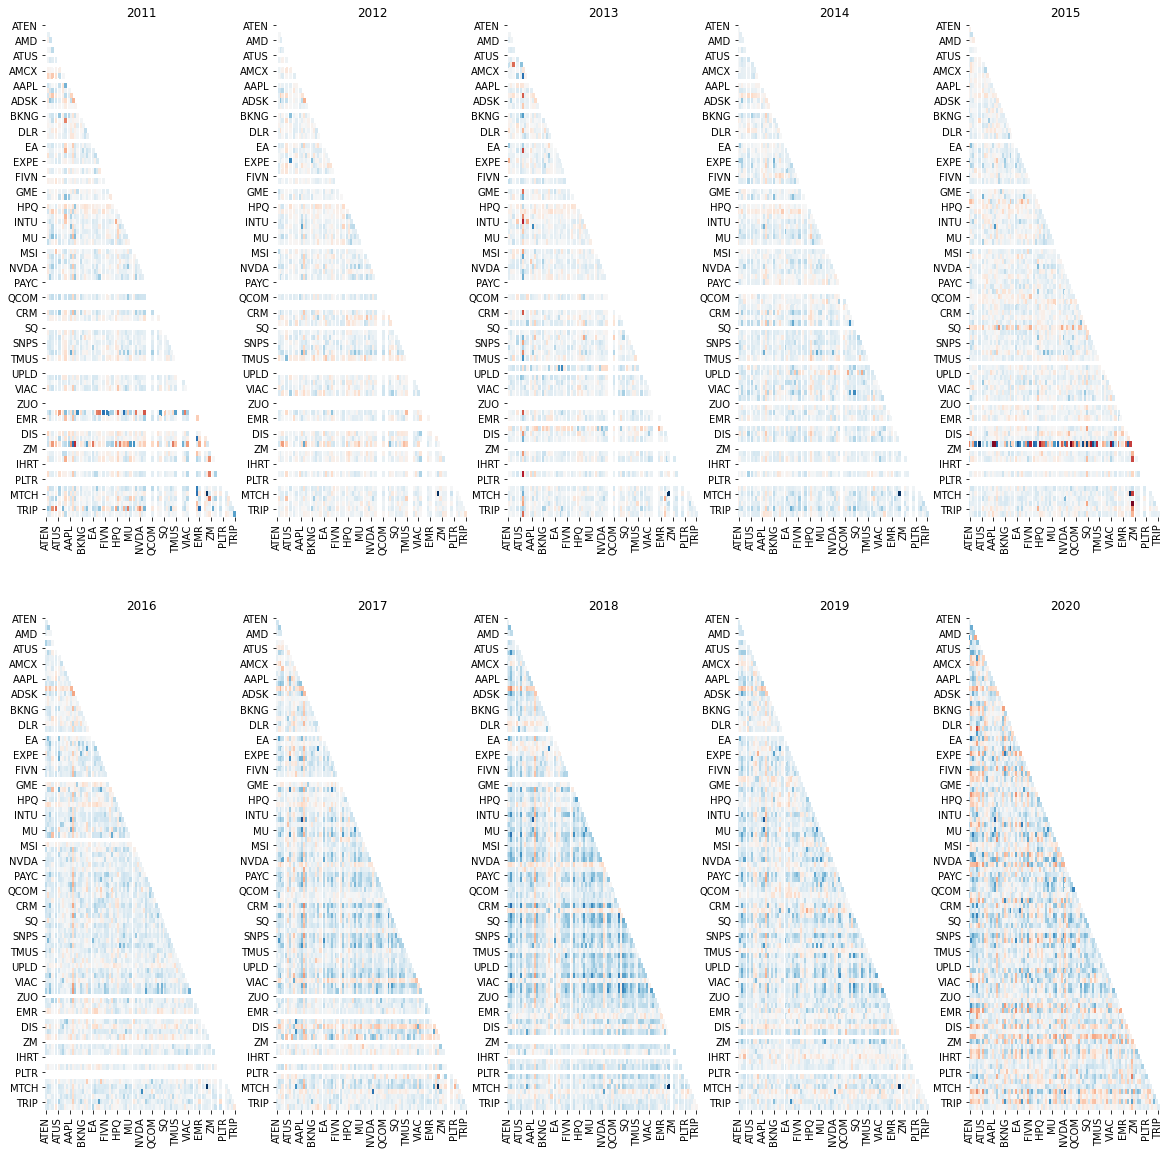

In [41]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,20))
axes=ax.reshape(-1)
i=0
for y in years:
    a=axes[i]
    a.set_title(y)
    corr_mat=rel_annual_corr.xs(y+'-12-31')
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,ax=a,vmin=-1,vmax=1,cbar=False,cmap='RdBu')
    i+=1

In [45]:
rel_annual_corr.xs('2011-12-31').describe().drop(['count'])

,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,SONO,IRBT,PLTR,ROKU,EBAY,MTCH,IPG,WU,TRIP,WWE
mean,NaN,0.022862,0.114238,0.097864,NaN,0.035823,NaN,0.087113,NaN,0.021595,...,NaN,0.072460,NaN,NaN,0.131343,0.062120,0.062003,0.053808,0.079335,0.053490
std,NaN,0.172634,0.154622,0.197427,NaN,0.188086,NaN,0.179793,NaN,0.158452,...,NaN,0.179628,NaN,NaN,0.168468,0.210303,0.195031,0.147594,0.297607,0.151952
min,NaN,-0.225805,-0.155260,-0.446792,NaN,-0.559605,NaN,-0.425189,NaN,-0.143312,...,NaN,-0.519568,NaN,NaN,-0.168904,-0.161687,-0.521692,-0.302794,-0.559605,-0.134784
25%,NaN,-0.067366,0.040989,0.028857,NaN,-0.057435,NaN,-0.020797,NaN,-0.061136,...,NaN,0.004572,NaN,NaN,0.032807,-0.047154,-0.028100,0.002643,-0.099933,-0.000074
50%,NaN,-0.004913,0.092477,0.109527,NaN,0.029813,NaN,0.060012,NaN,-0.000522,...,NaN,0.077713,NaN,NaN,0.102422,0.043883,0.069933,0.051105,0.042261,0.025529
75%,NaN,0.081148,0.183595,0.210118,NaN,0.112301,NaN,0.163042,NaN,0.049064,...,NaN,0.125149,NaN,NaN,0.193452,0.087709,0.160663,0.093562,0.239880,0.072129
max,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
rel_corr.describe().drop('count')

,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,SONO,IRBT,PLTR,ROKU,EBAY,MTCH,IPG,WU,TRIP,WWE
mean,0.076984,0.082376,0.138119,0.077122,0.085303,0.060742,0.066718,0.103892,0.053009,0.027095,...,0.062142,0.085115,0.039367,0.090973,0.054861,0.105750,0.045262,0.042346,0.068320,0.055438
std,0.120149,0.150806,0.169710,0.132039,0.306282,0.133779,0.113631,0.147729,0.148569,0.146294,...,0.121027,0.111532,0.164277,0.159104,0.115030,0.129115,0.163136,0.112430,0.133076,0.105606
min,-0.136475,-0.239043,-0.273827,-0.387419,-0.645871,-0.304435,-0.076544,-0.202088,-0.164238,-0.347445,...,-0.319201,-0.117542,-0.370507,-0.518926,-0.188257,-0.158195,-0.473805,-0.136674,-0.165472,-0.083541
25%,0.028400,0.013208,0.038539,0.023273,-0.121387,-0.001292,0.028312,0.021997,-0.033353,-0.048366,...,0.018133,0.046377,-0.050698,0.021743,-0.001503,0.046536,-0.035017,0.005381,0.008508,0.024196
50%,0.071523,0.082422,0.138467,0.059726,0.062537,0.062248,0.053457,0.087220,0.034800,-0.008431,...,0.056538,0.082838,0.037734,0.074619,0.053162,0.095565,0.012407,0.033082,0.055976,0.050509
75%,0.104582,0.152586,0.233700,0.117071,0.319619,0.103560,0.076344,0.167702,0.086644,0.054509,...,0.094829,0.112625,0.116530,0.173082,0.094237,0.139307,0.095063,0.059690,0.100016,0.072987
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
s=rel_corr.abs().mean()
s=s[s>s.quantile(0.9)]
#s.index
rel_corr[s.index]

,ADBE,ABNB,MDB,PYPL,NOW,SQ,SNPS,WDAY,ZEN,ZM
ATEN,0.082795,0.568178,0.125041,0.077631,0.112985,0.128618,0.099079,0.129124,0.114839,0.118559
ATVI,0.262221,-0.041356,0.193523,0.247794,0.184225,0.132598,0.220540,0.125737,0.173211,0.342807
ADBE,1.000000,0.360650,0.426431,0.424849,0.366686,0.325948,0.342163,0.360575,0.337716,0.287667
AMD,0.145787,-0.387419,0.209179,0.113479,0.129827,0.207662,0.157794,0.126493,0.159508,0.157692
ABNB,0.360650,1.000000,0.384441,0.433191,0.685837,0.440277,0.399232,0.557186,0.494285,0.459866
...,...,...,...,...,...,...,...,...,...,...
MTCH,0.157355,0.251720,0.233279,0.224968,0.150143,0.242968,0.169269,0.184520,0.183515,0.052767
IPG,-0.030188,-0.473805,-0.195989,-0.076381,-0.017095,-0.063587,-0.072960,-0.031779,-0.057117,-0.325279
WU,0.000091,-0.063515,-0.136674,0.005627,0.015917,-0.030645,0.028557,0.020697,-0.002166,-0.096857
TRIP,0.036608,-0.163745,-0.055525,-0.010541,0.074651,0.011509,-0.045828,0.100191,0.049090,-0.165472


In [93]:
filter_decile(rel_corr,0.75)

,ADBE,ABNB,AMZN,AMAT,T,ADSK,FIVN,FOX,INTU,LRCX,...,CRM,NOW,SQ,SNPS,TWLO,WDAY,ZEN,ZM,IHRT,ROKU
ADBE,1.000000,0.360650,0.286963,0.220309,-0.273827,0.395878,0.250221,-0.229707,0.324525,0.174239,...,0.383196,0.366686,0.325948,0.342163,0.299212,0.360575,0.337716,0.287667,-0.073954,0.222201
ABNB,0.360650,1.000000,0.072070,-0.097870,-0.423435,0.314353,0.327980,-0.249988,0.511664,-0.129227,...,0.628071,0.685837,0.440277,0.399232,0.378487,0.557186,0.494285,0.459866,-0.191267,0.597384
AMZN,0.286963,0.072070,1.000000,0.086533,-0.163140,0.155538,0.200711,-0.202088,0.153459,0.082263,...,0.250089,0.248979,0.223377,0.202296,0.266144,0.228585,0.199162,0.375975,-0.198001,0.220270
AMAT,0.220309,-0.097870,0.086533,1.000000,-0.191433,0.241268,0.095320,0.051303,0.162824,0.708150,...,0.127484,0.163730,0.271865,0.247753,0.139964,0.143381,0.183435,-0.078619,0.153854,0.109056
T,-0.273827,-0.423435,-0.163140,-0.191433,1.000000,-0.268412,-0.202285,0.182441,-0.157367,-0.182751,...,-0.280603,-0.241879,-0.274092,-0.203477,-0.229047,-0.269075,-0.245951,-0.254886,0.060547,-0.143080
ADSK,0.395878,0.314353,0.155538,0.241268,-0.268412,1.000000,0.193726,-0.072211,0.183627,0.218774,...,0.260251,0.294280,0.311750,0.247989,0.235895,0.307048,0.280536,0.167777,0.127752,0.188282
FIVN,0.250221,0.327980,0.200711,0.095320,-0.202285,0.193726,1.000000,-0.153651,0.199070,0.067566,...,0.250166,0.270172,0.269249,0.246943,0.368323,0.280290,0.279491,0.365848,-0.205032,0.214988
FOX,-0.229707,-0.249988,-0.202088,0.051303,0.182441,-0.072211,-0.153651,1.000000,-0.060177,0.065087,...,-0.106962,-0.198844,-0.022715,-0.123481,-0.150282,-0.049291,-0.135988,-0.176235,0.151489,-0.136618
INTU,0.324525,0.511664,0.153459,0.162824,-0.157367,0.183627,0.199070,-0.060177,1.000000,0.179487,...,0.236170,0.174021,0.285163,0.335707,0.228272,0.212741,0.247555,-0.016677,-0.075132,0.194246
LRCX,0.174239,-0.129227,0.082263,0.708150,-0.182751,0.218774,0.067566,0.065087,0.179487,1.000000,...,0.125991,0.148360,0.288439,0.253510,0.123589,0.128923,0.168345,-0.106792,0.102795,0.075863


In [92]:
def filter_decile(df,limit=0.9):
    means=df.abs().mean()
    idx=means[means>means.quantile(limit)].index
    return df.loc[idx,idx]

In [42]:
G=graphx.Graph()
G.add_nodes_from(rel_corr.index)

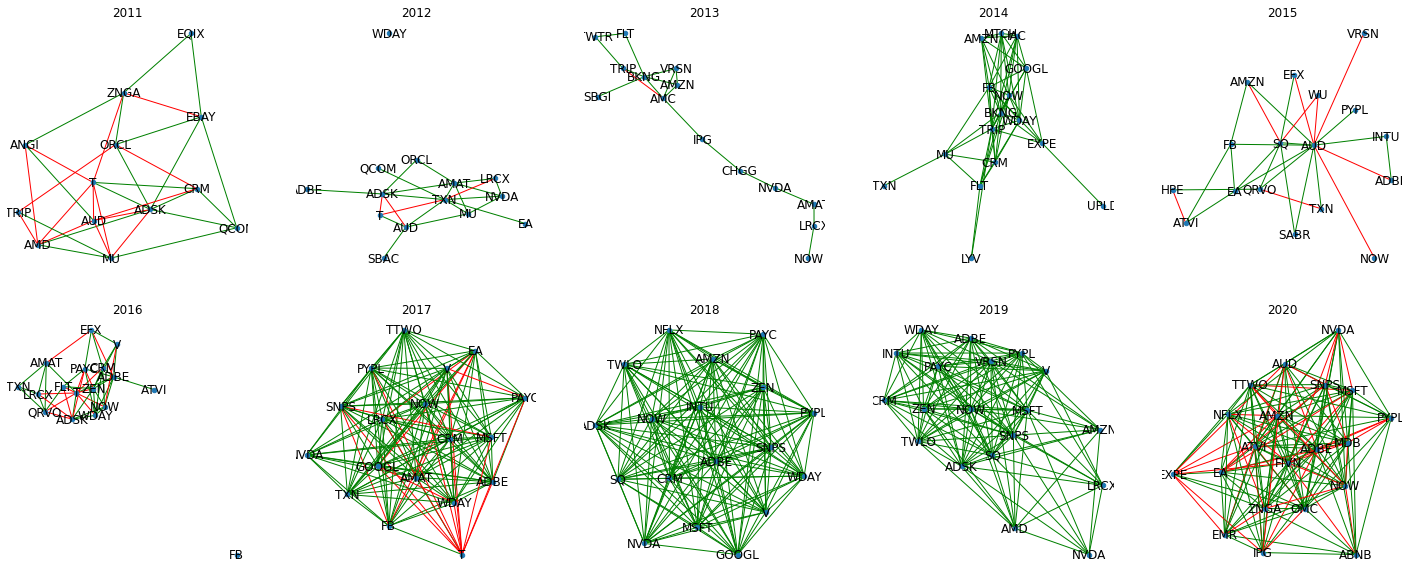

In [99]:
fig,axes=plt.subplots(ncols=5,nrows=2,figsize=(25,10))
axes=axes.reshape(-1)
i=0
for yr in years:
    Sigma=rel_annual_corr.xs(yr+'-12-31')
    Tops=filter_decile(Sigma,0.8)
    G=graphx.Graph()
    G.add_nodes_from(Tops.index)
    colors=[]
    a=axes[i]
    a.set_title(yr)
    for tick_a in G.nodes:
        for tick_b in G.nodes:
            p=Sigma[tick_a][tick_b]
            if((tick_a!=tick_b) and abs(p)>0.25):
                clr='green' if p>0 else 'red'
                colors.append(clr)
                G.add_edge(tick_a,tick_b,color=clr,weight=abs(p))
            else:
                pass
                #print(tick_a,tick_b)
    graphx.draw(G,with_labels=True,edge_color=colors,node_size=20,ax=a)
    i+=1

In [143]:
len(G.edges)

1395

In [181]:
G['FB']

AtlasView({})